<a href="https://www.kaggle.com/code/mikedelong/clean-rates-and-plot?scriptVersionId=135076341" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

filename = '../input/exchange-rates-from-1975-to-2022/Exchange Rates from 1975-2022.csv'
df = pd.read_csv(filepath_or_buffer=filename, skiprows=[0, 1, 3, 4, ], )
df.columns = ['Year', 'Month', 'AUD', 'CAD', 'CNY', 'EUR', 'INR', 'IDR', 'JPY', 'KRW', 'MYR', 'TWD', 'PHP', 'GBP', 'SGD', 'ZAR', 'CHF', 'THB', 'USD']
df = df.replace(to_replace={'N.A.': np.nan})
df = df.head(n=629)
df.head()

,Year,Month,AUD,CAD,CNY,EUR,INR,IDR,JPY,KRW,MYR,TWD,PHP,GBP,SGD,ZAR,CHF,THB,USD
0,1975,NaN,6.47,4.86,2.6657,NaN,NaN,NaN,0.0167,0.0098,NaN,0.130,NaN,10.90,2.08,NaN,1.91,NaN,4.939
1,1976,NaN,6.00,4.98,2.5401,NaN,NaN,NaN,0.0165,0.0099,NaN,0.129,NaN,8.86,1.99,NaN,1.96,NaN,4.904
2,1977,NaN,5.16,4.39,2.5131,NaN,NaN,NaN,0.0174,0.0096,NaN,0.123,NaN,8.14,1.91,NaN,1.95,NaN,4.662
3,1978,NaN,5.36,4.11,2.7681,NaN,NaN,NaN,0.0225,0.0096,NaN,0.126,NaN,9.00,2.06,NaN,2.65,NaN,4.685
4,1979,NaN,5.59,4.27,3.1971,NaN,NaN,NaN,0.0229,0.0103,NaN,0.125,NaN,10.64,2.30,NaN,3.01,NaN,5.003


In [2]:
# we have two datasets here: annual rates and monthly rates
# let's separate them into two frames
annual_df = df[df['Month'].isna()]
monthly_df = df[~df['Month'].isna()]

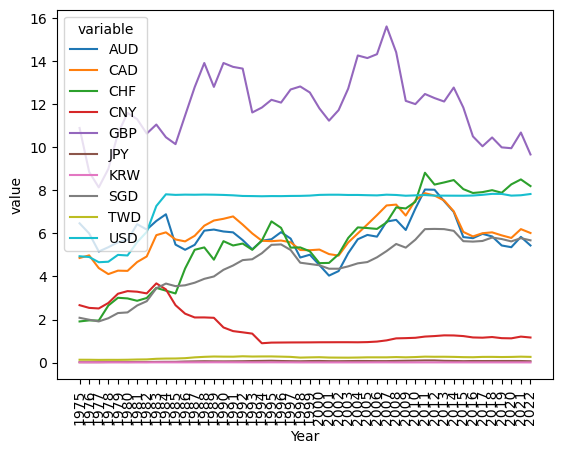

In [3]:
# plot the annual rates
%matplotlib inline
from seaborn import lineplot
drop_columns = sorted(['Month', 'EUR', 'INR', 'IDR', 'MYR', 'PHP', 'ZAR', 'THB'])
keep_columns = sorted(['AUD', 'CAD', 'CNY', 'JPY', 'KRW', 'TWD', 'GBP', 'SGD', 'CHF', 'USD'])
ax = lineplot(data=pd.melt(annual_df.drop(columns=drop_columns), id_vars='Year', value_vars=keep_columns, ), x='Year', y='value', hue='variable')
ax.tick_params(axis='x', rotation=90)

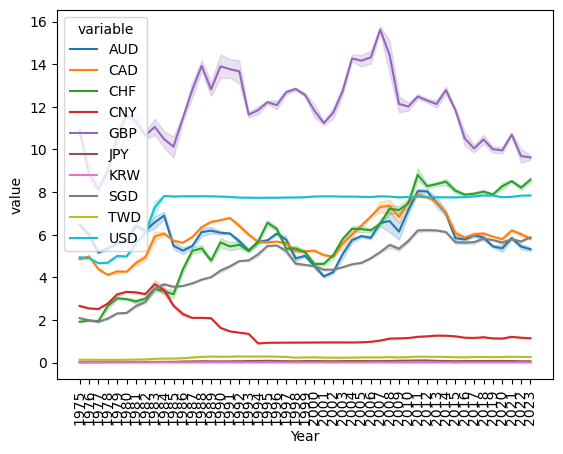

In [4]:
# we can do the same with the monthly data 
ax = lineplot(data=pd.melt(monthly_df.drop(columns=drop_columns), id_vars='Year', value_vars=keep_columns, ), x='Year', y='value', hue='variable')
ax.tick_params(axis='x', rotation=90)